In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [217]:
center = (10,10)
cx, cy = center
N = 8
R = 50
unit_angle = 2*np.pi/N
print(unit_angle, '= unitangle \n')
pointsx = []
pointsy = []

angle = 0
points = []

for i in range(N):
    dx = R*np.cos(angle)
    dy = R*np.sin(angle)
    point = (dx, dy)
    points.append(point)
    pointsx.append(dx)
    pointsy.append(dy)

    angle = angle + unit_angle
    # print(angle)




0.7853981633974483 = unitangle 



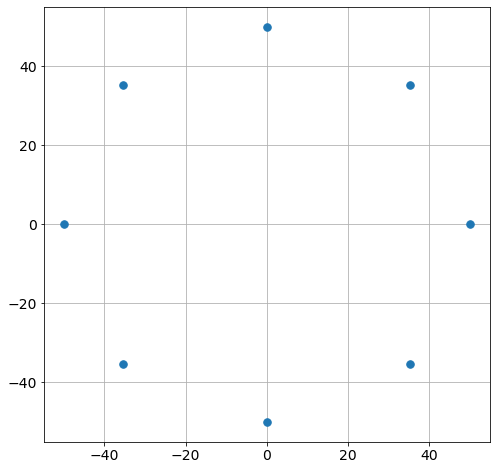

In [218]:
plt.rcParams.update(
    {'font.size': 14, 'lines.markersize': 15, 'lines.linewidth': 0, 'axes.grid': True, 'lines.marker': '.',
     })
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(pointsx, pointsy)

# ax.legend()

In [219]:
class Camera:
    def __init__(self, player = (0,200,200), direction=(0,-1,0), ):

        deg = 30
        self.pos = player
        deg_rad = deg*np.pi/180
        self.player_sc_dist = WIDTH/2/np.tan(deg_rad)


c = Camera()
c.player_sc_dist


866.0254037844387

In [220]:
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLACK = (0, 0, 0)

scale = 100
WIDTH, HEIGHT = 1000, 800
screen_center = [WIDTH/2, HEIGHT/2]  # x, y


In [221]:
def get_matrix_Tr(tx, ty, tz):
    translation_matrix = np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]])
    return translation_matrix

# ============= Functions ==================
def drawline_3d(point1, point2):
    # tuple1 = (point1.vec[0, 0], point1.vec[1, 0])
    # tuple2 = (point2.vec[0, 0], point2.vec[1, 0])
    pygame.draw.line(screen, BLACK, (point1.x,point1.y),\
        (point2.x, point2.y), width = 4)


def drawline_2d(point1, point2):
    # pygame.draw.line(screen, BLACK, (point1.x,point1.y),\
    #     (point2.x, point2.y), width=4)
    pygame.draw.line(screen, BLACK, (point1[0,0], point1[1,0]), \
        (point2[0,0], point2[1,0]), width=4)


# ============= Classes ==================
class Point():
    def __init__(self, x, y, z):
        self.vec = np.array([[x], [y], [z], [1]])
        self.x = self.vec[0, 0]
        self.y = self.vec[1, 0]
        self.z = self.vec[2, 0]


    # def __add__(self, other_point):

    def vecprod(self, matrix):
        self.vec = matrix @ self.vec
        self.x = self.vec[0, 0]
        self.y = self.vec[1, 0]
        self.z = self.vec[2, 0]

        return True


In [222]:
class Wheel:
    def __init__(self, radius, height=0, x=0, y=0, z=0, color='black'):

        self.radius = radius
        self.height = height

        self.diag_coef = radius/np.sqrt(2)
        self.color = color

        self.center = Point(x, y, z)
        self.top = Point(x, y, height)

        self.circle_points = []
        self.circle_points.append(
            Point(self.center.x, self.center.y + self.radius, self.center.z))
        self.circle_points.append(Point(self.center.x + self.diag_coef, self.center.y + self.diag_coef,
                                        self.center.z))
        self.circle_points.append(
            Point(self.center.x + self.radius, self.center.y, self.center.z))
        self.circle_points.append(Point(self.center.x + self.diag_coef, self.center.y - self.diag_coef,
                                        self.center.z))
        self.circle_points.append(
            Point(self.center.x, self.center.y - self.radius, self.center.z))
        self.circle_points.append(Point(self.center.x - self.diag_coef, self.center.y - self.diag_coef,
                                        self.center.z))
        self.circle_points.append(
            Point(self.center.x - self.radius, self.center.y, self.center.z))
        self.circle_points.append(Point(self.center.x - self.diag_coef, self.center.y + self.diag_coef,
                                        self.center.z))

        self.points = list(self.circle_points)
        self.points.append(self.center)
        self.points.append(self.top)

    def translate_2_origin(self,):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Tr(-cx, -cy, -cz))
        return True

    def translate(self, tx, ty, tz):
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Tr(tx, ty, tz))
        return True

# ====================== Rotation ======================
    def rotate_x(self, angle):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        self.translate_2_origin()
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Rx(angle))
        self.translate(cx, cy, cz)
        return True

    def rotate_y(self, angle):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        self.translate_2_origin()
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Ry(angle))
        self.translate(cx, cy, cz)
        return True

    def rotate_z(self, angle):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        self.translate_2_origin()
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Rz(angle))
        self.translate(cx, cy, cz)
        return True


In [223]:
w = Wheel(100, height=200, x=0, y=0)
def get_column(vec):
    x, y, z = vec[0, 0], vec[1, 0], vec[2, 0]
    return (x,y,z)


def get_row(vec):
    x, y, z = vec[0], vec[1], vec[2]
    return (x, y, z)


In [224]:
                # n =  a     b    c
def get_prog_matrix(n=np.array([0, -1, 0, 0]), displacement=np.array([0, 150, 150, 0])):
    A = np.diag(n)
    A[:,3] = displacement
    print(A,'\n' ,A.T)
    
    return A
    # A @ np.linalg.inv(A.T @ A) @ A.T

# get_prog_matrix()


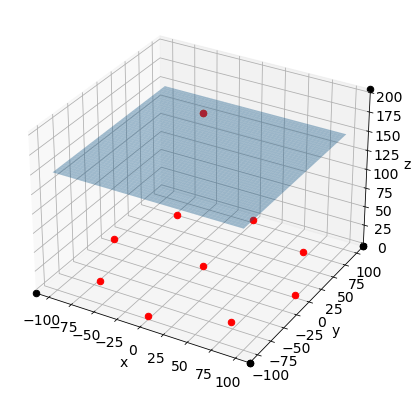

In [241]:
plt.rcParams.update(
    {'font.size': 14, 'lines.markersize': 13, 'lines.linewidth': 0, 'axes.grid': True, 'lines.marker': '.',
     })  # 'axes.prop_cycle': plt.cycler(color=colors)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))
xx, yy = np.meshgrid(np.arange(10), np.arange(10))




ax.plot(*get_column(w.top.vec))
for p in w.points:
    ax.plot(*get_column(p.vec), color = 'red')
# ax.set_xlim(-300, 300)
# ax.set_ylim(-300, 300)
# ax.set_zlim(-300, 300)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for ii in range(0, 0, 1):
    ax.view_init(elev=33., azim=ii)


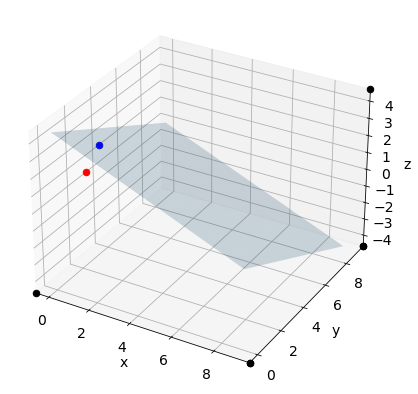

In [226]:
plt.rcParams.update(
    {'font.size': 14, 'lines.markersize': 13, 'lines.linewidth': 0, 'axes.grid': True, 'lines.marker': '.',
     })  # 'axes.prop_cycle': plt.cycler(color=colors)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))

point1 = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point1.dot(normal)

xx, yy = np.meshgrid(np.arange(10), np.arange(10))
z = (-normal[0] * xx - normal[1] * yy - d) * 1/normal[2]

ax.plot_surface(xx, yy, z, alpha=0.2)
ax.plot(*get_row(point1), color='blue')
ax.plot(*get_row(normal), color='red')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for ii in range(0, 0, 1):
    ax.view_init(elev=33., azim=ii)


1491886

In [246]:
a = [1,2,3,4,5,6]
for i,x in enumerate(a):
    a[i] = a[i]+1
a

[2, 3, 4, 5, 6, 7]